# Algerian Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
Bejajia=df[0:122]
Siedel=df[123:]

In [4]:
Siedel=Siedel.drop(123,axis=0)
Siedel.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [5]:
Bejajia.loc[:122,'Region']=0
Siedel.loc[124:,'Region']=1

/tmp/ipykernel_77/3654093139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bejajia.loc[:122,'Region']=0
/tmp/ipykernel_77/3654093139.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Bejajia.loc[:122,'Region']=0
/tmp/ipykernel_77/3654093139.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Siedel.loc[

In [6]:
df1=pd.concat([Bejajia,Siedel])

### Step-2:-Cleaning.

In [7]:
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [8]:
df1.columns=df1.columns.str.strip()

In [9]:
df1.Classes=df1.Classes.str.strip()

In [10]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [11]:
df1[df1.isnull().any(axis=1)]=df1[df1.isnull().any(axis=1)].fillna('fire')

In [12]:
df1[df1.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [13]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [15]:
for i in df1.columns[0:11]:
    df1[i]=df1[i].str.replace(' ','')
    for j in df1[i]:
        if j=='fire   ':
            a=i

In [17]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df1[['day','month','year','Temperature','RH','Ws']]=df1[['day','month','year','Temperature','RH','Ws']].astype('int')

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 38.6+ KB


In [79]:
for i in df1.columns:
    if df1[i].dtypes=='object' and i!='Classes':
        df1[i]=df1[i].astype('float')

In [40]:
df1[df1['FWI']!='fire   ']['FWI'].astype('float').mean()

7.0353909465020585

In [76]:
df1.at[167,'FWI']='7.04'

In [77]:
df1.at[167,'FWI']

'7.04'

### EDA.

In [81]:
df1.to_csv('AF_and_SF.csv')

In [83]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

<AxesSubplot: xlabel='month', ylabel='Rain'>

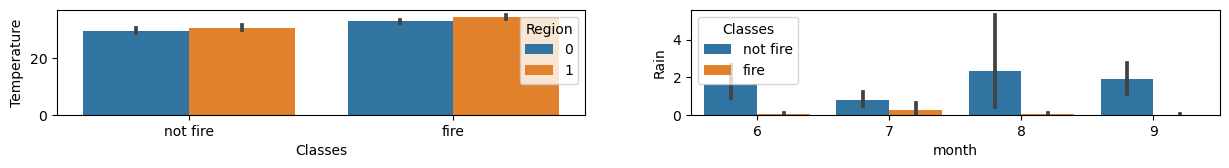

In [90]:
plt.figure(figsize=(15,3))
plt.subplot(2,2,1)
sns.barplot(df1,x='Classes',y='Temperature',hue='Region')
plt.subplot(2,2,2)
sns.barplot(df1,x='month',y='Rain',hue='Classes')

/tmp/ipykernel_77/1028306808.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<AxesSubplot: >

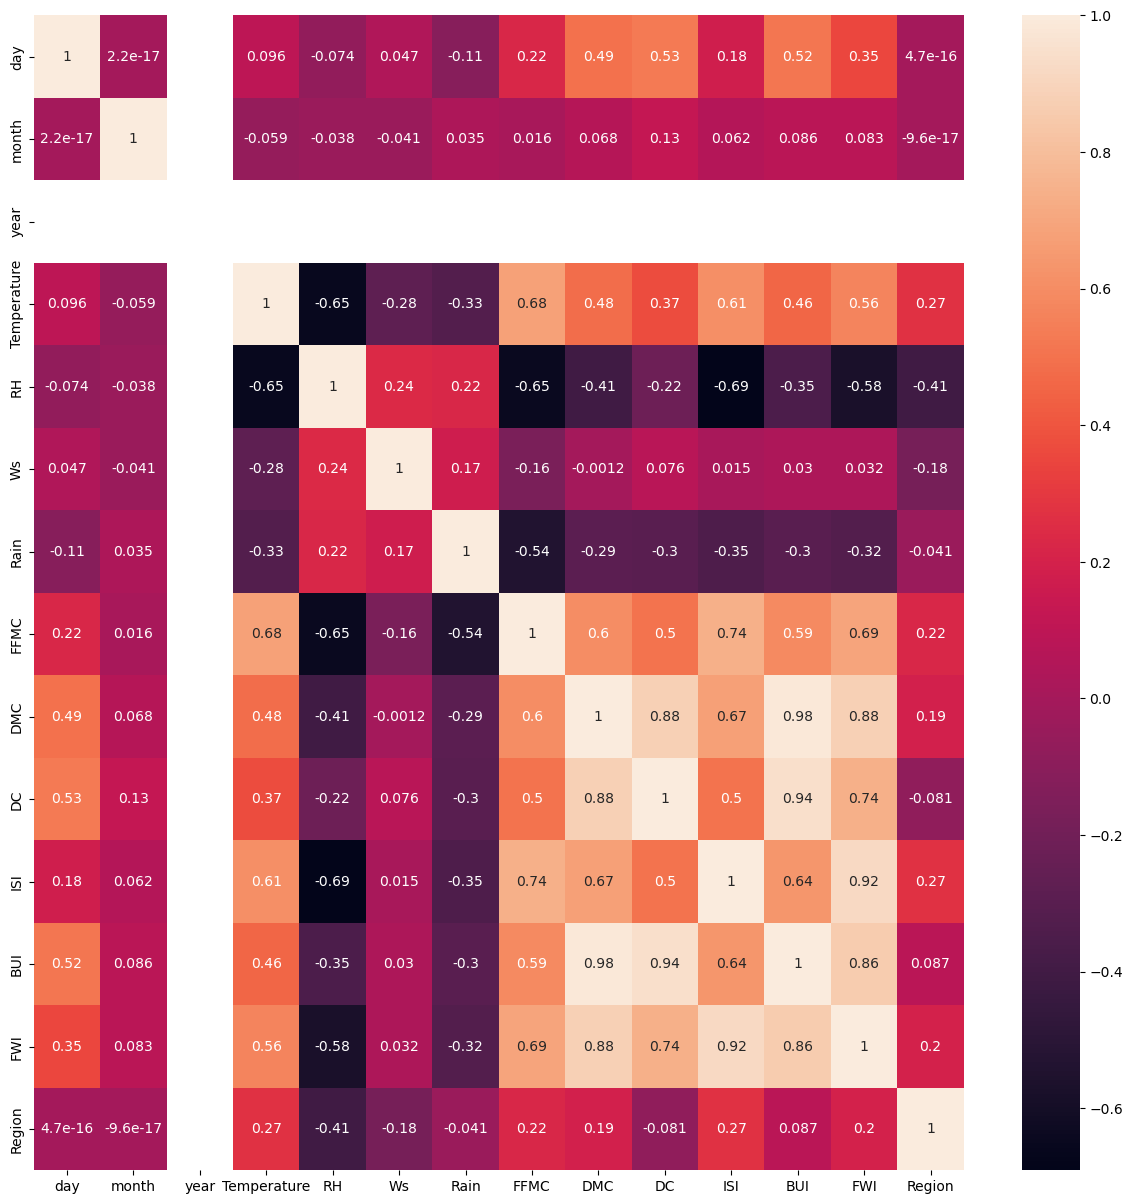

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True)


In [57]:
df=pd.read_csv('AF_and_SF.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [58]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [59]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [60]:
x=x.drop('Unnamed: 0',axis=1)

In [61]:
x

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,not fire,1


### Feature Selection.

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [63]:
def selection(dataset,threshold):
    corr_columns=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_columns.add(corr_matrix.columns[i])
                
    return corr_columns
                

In [64]:
corr1=selection(x_train,0.85)

/tmp/ipykernel_78/1424139976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


In [65]:
x_train.drop(corr1,axis=1,inplace=True)
x_test.drop(corr1,axis=1,inplace=True)

In [66]:
x_train.drop(['day','month','year'],axis=1,inplace=True)
x_test.drop(['day','month','year'],axis=1,inplace=True)

In [67]:
x_test.shape,x_train.shape

((61, 9), (183, 9))

In [78]:
x_train['Classes']=np.where(x_train['Classes'].str.contains("not fire"),0,1)
x_test['Classes']=np.where(x_test['Classes'].str.contains("not fire"),0,1)

In [79]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
181,36,56,16,0.0,88.9,23.8,8.2,1,1
225,31,72,14,0.0,84.2,8.3,3.8,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
104,25,86,21,4.6,40.9,1.3,0.1,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,33,57,16,0.0,87.5,15.7,6.7,1,1


In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [81]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
181,36,56,16,0.0,88.9,23.8,8.2,1,1
225,31,72,14,0.0,84.2,8.3,3.8,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
104,25,86,21,4.6,40.9,1.3,0.1,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,33,57,16,0.0,87.5,15.7,6.7,1,1


In [82]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<AxesSubplot: >

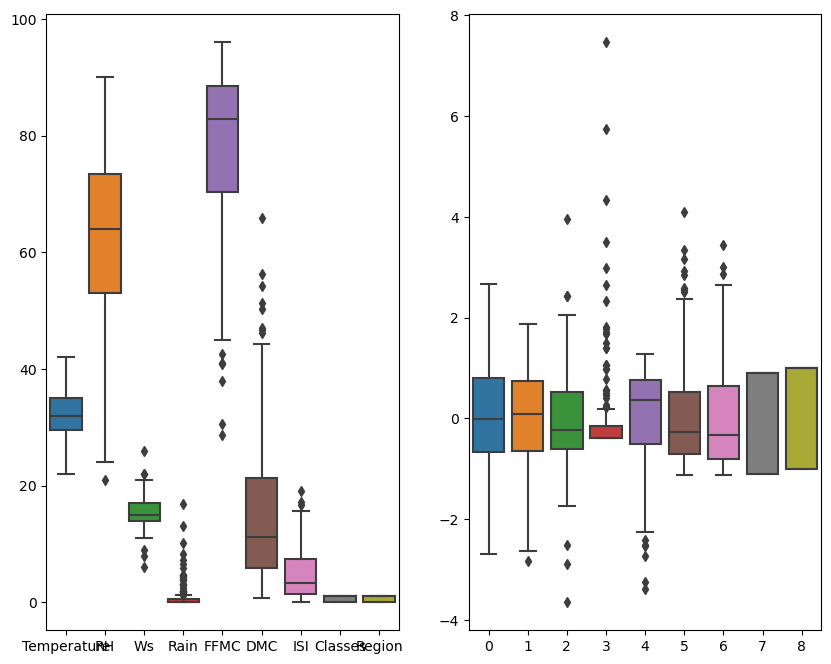

In [85]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)

### MODEL

In [95]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
reg=LinearRegression()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.6075283831968031, 0.9888534462262419)

In [96]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_predict=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.8583115797534516, 0.9783618115763388)

In [97]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y_predict=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.605814141027671, 0.9889223882035743)

In [99]:
elastic_net=ElasticNet()
elastic_net.fit(x_train,y_train)
y_predict=elastic_net.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
mae,score

(0.8350870069750866, 0.9793831765490516)

We will use Ridge Regression as it is Robust to outliers and handles overfitting.

In [100]:
import pickle
pickle.dump(scaler,open('Scaler.pickle','wb'))
pickle.dump(ridge,open('Model.pickle','wb'))

In [104]:
j=pickle.load(open('Scaler.pickle','rb'))
i=pickle.load(open('Model.pickle','rb'))